In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df4=pd.read_csv("./secondf.csv")
df7=pd.read_csv("./firstdf.csv")
df3=pd.read_csv("./third.csv")
df5=pd.read_csv("./forth.csv")
df6=pd.read_csv("./fifth.csv")
df9=pd.read_csv("./seventh.csv")



cars=[df4,df7,df3,df5,df6,df9]
all_cars=pd.concat(cars,ignore_index=True)

In [49]:
all_cars.head()

,Unnamed: 0,Brand,Model,Year,Km,EngSize,Hp,Fuel,Gear Type,Fuel Consumption,Price
0,0,Fiat,1.4 Fire Urban,2022.0,6.500 km,1368 cc,95 hp,Benzin,Düz,"6,4 lt",565.000 TL
1,1,Fiat,1.4 Fire Urban,2021.0,32.000 km,1368 cc,95 hp,Benzin,Düz,"6,6 lt",520.000 TL
2,2,Fiat,1.4 Fire Urban,2021.0,52.000 km,1368 cc,95 hp,Benzin,Düz,"6,4 lt",483.000 TL
3,3,Fiat,1.4 Fire Easy,2019.0,48.000 km,1368 cc,95 hp,Benzin,Düz,"5,7 lt",410.000 TL
4,4,Fiat,1.4 Fire Urban,2022.0,6.100 km,1368 cc,95 hp,Benzin,Düz,"6,4 lt",497.000 TL


In [50]:
all_cars.tail()

,Unnamed: 0,Brand,Model,Year,Km,EngSize,Hp,Fuel,Gear Type,Fuel Consumption,Price
12695,1795,Toyota,1.6 Dream,2020.0,24.500 km,1598 cc,132 hp,Benzin,Otomatik,"5,5 lt",742.000 TL
12696,1796,Toyota,1.6 Premium,2015.0,72.000 km,1598 cc,132 hp,Benzin,Otomatik,"6,1 lt",620.000 TL
12697,1797,Toyota,1.6,2005.0,270.000 km,1598 cc,110 hp,LPG & Benzin,Düz,"7,2 lt",297.000 TL
12698,1798,Toyota,1.5 Dream,2022.0,1.001 km,1490 cc,125 hp,Benzin,Otomatik,"5,8 lt",801.000 TL
12699,1799,Toyota,1.6 Vision,2020.0,86 km,1598 cc,132 hp,Benzin,Otomatik,"5,5 lt",759.000 TL


In [59]:
all_cars.columns=all_cars.columns.str.strip()

In [53]:
all_cars.tail()

,Unnamed: 0,Brand,Model,Year,Km,EngSize,Hp,Fuel,Gear Type,Fuel Consumption,Price
12695,1795,Toyota,1.6 Dream,2020.0,24.500 km,1598 cc,132 hp,Benzin,Otomatik,"5,5 lt",742.000 TL
12696,1796,Toyota,1.6 Premium,2015.0,72.000 km,1598 cc,132 hp,Benzin,Otomatik,"6,1 lt",620.000 TL
12697,1797,Toyota,1.6,2005.0,270.000 km,1598 cc,110 hp,LPG & Benzin,Düz,"7,2 lt",297.000 TL
12698,1798,Toyota,1.5 Dream,2022.0,1.001 km,1490 cc,125 hp,Benzin,Otomatik,"5,8 lt",801.000 TL
12699,1799,Toyota,1.6 Vision,2020.0,86 km,1598 cc,132 hp,Benzin,Otomatik,"5,5 lt",759.000 TL


In [52]:
all_cars=all_cars.dropna()

In [51]:
all_cars.isnull().sum()

Unnamed: 0             0
Brand                 42
Model                 42
Year                  42
Km                    42
EngSize              217
Hp                   232
Fuel                  42
Gear Type             42
Fuel Consumption     740
Price                 42
dtype: int64

In [47]:
all_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12700 entries, 0 to 1799
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12700 non-null  int64  
 1   Brand              12658 non-null  object 
 2   Model              12658 non-null  object 
 3   Year               12658 non-null  float64
 4   Km                 12658 non-null  object 
 5   EngSize            12483 non-null  object 
 6   Hp                 12468 non-null  object 
 7   Fuel               12658 non-null  object 
 8   Gear Type          12658 non-null  object 
 9   Fuel Consumption   11960 non-null  object 
 10  Price              12658 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.2+ MB


In [54]:
all_cars["Year"]=all_cars["Year"].astype(int)
all_cars["Age"]=2023-all_cars["Year"]

In [55]:
all_cars["Km"]=all_cars["Km"].str.replace("km", "")
all_cars["Km"]=all_cars["Km"].str.replace(".", "")
all_cars["Km"]=all_cars["Km"].astype(float).astype(int)


C:\Users\User\AppData\Local\Temp\ipykernel_744\666407982.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  all_cars["Km"]=all_cars["Km"].str.replace(".", "")


In [56]:
all_cars["EngSize"]=all_cars["EngSize"].str.replace(" cc", "")
all_cars["EngSize"]=all_cars["EngSize"].str.replace(" cm3", "")
all_cars["EngSize"]=all_cars["EngSize"].str.replace(" -", "")
all_cars['EngSize'] = all_cars['EngSize'].str.split(" ").str[0].astype(int)

In [57]:
all_cars["Hp"]=all_cars["Hp"].str.replace(" hp", "")
all_cars["Hp"]=all_cars["Hp"].str.replace(" Hp", "")
all_cars["Hp"]=all_cars["Hp"].str.replace(" -", "")
all_cars['Hp'] = all_cars['Hp'].str.split(" ").str[0].astype(int)

In [60]:
all_cars["Fuel Consumption"]=all_cars["Fuel Consumption"].str.replace("lt","")
all_cars["Fuel Consumption"]=all_cars["Fuel Consumption"].str.replace(",",".")
all_cars["Fuel Consumption"]=all_cars["Fuel Consumption"].str.strip()
all_cars["Fuel Consumption"]=all_cars["Fuel Consumption"].astype(float)

In [61]:
all_cars["Price"]=all_cars["Price"].str.replace("TL","")
all_cars["Price"]=all_cars["Price"].str.replace(".","")
all_cars["Price"]=all_cars["Price"].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_744\2869661874.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  all_cars["Price"]=all_cars["Price"].str.replace(".","")


In [63]:
all_cars.head(8)

,Unnamed: 0,Brand,Model,Year,Km,EngSize,Hp,Fuel,Gear Type,Fuel Consumption,Price,Age
0,0,Fiat,1.4 Fire Urban,2022,6500,1368,95,Benzin,Düz,6.4,565000,1
1,1,Fiat,1.4 Fire Urban,2021,32000,1368,95,Benzin,Düz,6.6,520000,2
2,2,Fiat,1.4 Fire Urban,2021,52000,1368,95,Benzin,Düz,6.4,483000,2
3,3,Fiat,1.4 Fire Easy,2019,48000,1368,95,Benzin,Düz,5.7,410000,4
4,4,Fiat,1.4 Fire Urban,2022,6100,1368,95,Benzin,Düz,6.4,497000,1
5,5,Fiat,1.3 Multijet Easy,2017,83000,1248,95,Dizel,Düz,4.1,412500,6
6,6,Fiat,1.3 Multijet Easy,2018,73500,1248,95,Dizel,Düz,4.1,422500,5
7,7,Fiat,1.4 Fire Urban Plus,2020,38000,1368,95,Benzin,Düz,5.7,420000,3


In [64]:
all_cars.tail(9)

,Unnamed: 0,Brand,Model,Year,Km,EngSize,Hp,Fuel,Gear Type,Fuel Consumption,Price,Age
12691,1791,Toyota,1.4 D-4D Advance,2014,160500,1364,90,Dizel,Yarı Otomatik,4.1,490000,9
12692,1792,Toyota,1.6 Sol Plus,2007,163000,1598,110,LPG & Benzin,Düz,7.0,375000,16
12693,1793,Toyota,1.4 D-4D Comfort Extra,2012,171000,1364,90,Dizel,Yarı Otomatik,4.8,400000,11
12694,1794,Toyota,1.6 Elegant,2009,198000,1598,124,LPG & Benzin,Düz,7.2,350000,14
12695,1795,Toyota,1.6 Dream,2020,24500,1598,132,Benzin,Otomatik,5.5,742000,3
12696,1796,Toyota,1.6 Premium,2015,72000,1598,132,Benzin,Otomatik,6.1,620000,8
12697,1797,Toyota,1.6,2005,270000,1598,110,LPG & Benzin,Düz,7.2,297000,18
12698,1798,Toyota,1.5 Dream,2022,1001,1490,125,Benzin,Otomatik,5.8,801000,1
12699,1799,Toyota,1.6 Vision,2020,86,1598,132,Benzin,Otomatik,5.5,759000,3


In [65]:
all_cars.drop("Unnamed: 0",axis=1,inplace=True)
all_cars.head(8)

,Brand,Model,Year,Km,EngSize,Hp,Fuel,Gear Type,Fuel Consumption,Price,Age
0,Fiat,1.4 Fire Urban,2022,6500,1368,95,Benzin,Düz,6.4,565000,1
1,Fiat,1.4 Fire Urban,2021,32000,1368,95,Benzin,Düz,6.6,520000,2
2,Fiat,1.4 Fire Urban,2021,52000,1368,95,Benzin,Düz,6.4,483000,2
3,Fiat,1.4 Fire Easy,2019,48000,1368,95,Benzin,Düz,5.7,410000,4
4,Fiat,1.4 Fire Urban,2022,6100,1368,95,Benzin,Düz,6.4,497000,1
5,Fiat,1.3 Multijet Easy,2017,83000,1248,95,Dizel,Düz,4.1,412500,6
6,Fiat,1.3 Multijet Easy,2018,73500,1248,95,Dizel,Düz,4.1,422500,5
7,Fiat,1.4 Fire Urban Plus,2020,38000,1368,95,Benzin,Düz,5.7,420000,3


In [66]:
all_cars.tail(8)

,Brand,Model,Year,Km,EngSize,Hp,Fuel,Gear Type,Fuel Consumption,Price,Age
12692,Toyota,1.6 Sol Plus,2007,163000,1598,110,LPG & Benzin,Düz,7.0,375000,16
12693,Toyota,1.4 D-4D Comfort Extra,2012,171000,1364,90,Dizel,Yarı Otomatik,4.8,400000,11
12694,Toyota,1.6 Elegant,2009,198000,1598,124,LPG & Benzin,Düz,7.2,350000,14
12695,Toyota,1.6 Dream,2020,24500,1598,132,Benzin,Otomatik,5.5,742000,3
12696,Toyota,1.6 Premium,2015,72000,1598,132,Benzin,Otomatik,6.1,620000,8
12697,Toyota,1.6,2005,270000,1598,110,LPG & Benzin,Düz,7.2,297000,18
12698,Toyota,1.5 Dream,2022,1001,1490,125,Benzin,Otomatik,5.8,801000,1
12699,Toyota,1.6 Vision,2020,86,1598,132,Benzin,Otomatik,5.5,759000,3


In [67]:
all_cars.drop("Model",axis=1,inplace=True)

In [68]:
all_cars.head(8)

,Brand,Year,Km,EngSize,Hp,Fuel,Gear Type,Fuel Consumption,Price,Age
0,Fiat,2022,6500,1368,95,Benzin,Düz,6.4,565000,1
1,Fiat,2021,32000,1368,95,Benzin,Düz,6.6,520000,2
2,Fiat,2021,52000,1368,95,Benzin,Düz,6.4,483000,2
3,Fiat,2019,48000,1368,95,Benzin,Düz,5.7,410000,4
4,Fiat,2022,6100,1368,95,Benzin,Düz,6.4,497000,1
5,Fiat,2017,83000,1248,95,Dizel,Düz,4.1,412500,6
6,Fiat,2018,73500,1248,95,Dizel,Düz,4.1,422500,5
7,Fiat,2020,38000,1368,95,Benzin,Düz,5.7,420000,3


In [71]:
all_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11941 entries, 0 to 11940
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             11941 non-null  object 
 1   Year              11941 non-null  int32  
 2   Km                11941 non-null  int32  
 3   EngSize           11941 non-null  int32  
 4   Hp                11941 non-null  int32  
 5   Fuel              11941 non-null  object 
 6   Gear Type         11941 non-null  object 
 7   Fuel Consumption  11941 non-null  float64
 8   Price             11941 non-null  int32  
 9   Age               11941 non-null  int32  
dtypes: float64(1), int32(6), object(3)
memory usage: 653.1+ KB


In [70]:
all_cars = all_cars.reset_index(drop=True)

In [72]:
all_cars.drop("Year",axis=1,inplace=True)
all_cars.head(8)

,Brand,Km,EngSize,Hp,Fuel,Gear Type,Fuel Consumption,Price,Age
0,Fiat,6500,1368,95,Benzin,Düz,6.4,565000,1
1,Fiat,32000,1368,95,Benzin,Düz,6.6,520000,2
2,Fiat,52000,1368,95,Benzin,Düz,6.4,483000,2
3,Fiat,48000,1368,95,Benzin,Düz,5.7,410000,4
4,Fiat,6100,1368,95,Benzin,Düz,6.4,497000,1
5,Fiat,83000,1248,95,Dizel,Düz,4.1,412500,6
6,Fiat,73500,1248,95,Dizel,Düz,4.1,422500,5
7,Fiat,38000,1368,95,Benzin,Düz,5.7,420000,3


In [73]:
all_cars["Brand"].unique()

array(['Fiat', 'Renault', 'Volkswagen', 'Ford', 'Toyota'], dtype=object)

In [74]:
all_cars["Gear Type"].unique()

array(['Düz', 'Yarı Otomatik', 'Otomatik'], dtype=object)

In [75]:
all_cars["Fuel"].unique()

array(['Benzin', 'Dizel', 'LPG & Benzin', 'Hibrit'], dtype=object)

In [78]:
#  'all_cars' that contains the columns 'Brand', 'Gear Type', and 'Fuel'

# Define the columns to be one-hot encoded
columns_to_encode = ['Brand', 'Gear Type', 'Fuel']

# Apply one-hot encoding with drop_first=True
df_encoded = pd.get_dummies(all_cars, columns=columns_to_encode)

# Print the encoded DataFrame
print(df_encoded)


           Km  EngSize   Hp  Fuel Consumption   Price  Age  Brand_Fiat  \
0        6500     1368   95               6.4  565000    1           1   
1       32000     1368   95               6.6  520000    2           1   
2       52000     1368   95               6.4  483000    2           1   
3       48000     1368   95               5.7  410000    4           1   
4        6100     1368   95               6.4  497000    1           1   
...       ...      ...  ...               ...     ...  ...         ...   
11936   24500     1598  132               5.5  742000    3           0   
11937   72000     1598  132               6.1  620000    8           0   
11938  270000     1598  110               7.2  297000   18           0   
11939    1001     1490  125               5.8  801000    1           0   
11940      86     1598  132               5.5  759000    3           0   

       Brand_Ford  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0               0              0           

In [87]:
df_encoded.head(8)

,Km,EngSize,Hp,Fuel Consumption,Price,Age,Brand_Fiat,Brand_Ford,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Gear Type_Düz,Gear Type_Otomatik,Gear Type_Yarı Otomatik,Fuel_Benzin,Fuel_Dizel,Fuel_Hibrit,Fuel_LPG & Benzin
0,6500,1368,95,6.4,565000,1,1,0,0,0,0,1,0,0,1,0,0,0
1,32000,1368,95,6.6,520000,2,1,0,0,0,0,1,0,0,1,0,0,0
2,52000,1368,95,6.4,483000,2,1,0,0,0,0,1,0,0,1,0,0,0
3,48000,1368,95,5.7,410000,4,1,0,0,0,0,1,0,0,1,0,0,0
4,6100,1368,95,6.4,497000,1,1,0,0,0,0,1,0,0,1,0,0,0
5,83000,1248,95,4.1,412500,6,1,0,0,0,0,1,0,0,0,1,0,0
6,73500,1248,95,4.1,422500,5,1,0,0,0,0,1,0,0,0,1,0,0
7,38000,1368,95,5.7,420000,3,1,0,0,0,0,1,0,0,1,0,0,0


In [83]:
df_encoded.columns

Index(['Km', 'EngSize', 'Hp', 'Fuel Consumption', 'Price', 'Age', 'Brand_Fiat',
       'Brand_Ford', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Gear Type_Düz', 'Gear Type_Otomatik', 'Gear Type_Yarı Otomatik',
       'Fuel_Benzin', 'Fuel_Dizel', 'Fuel_Hibrit', 'Fuel_LPG & Benzin'],
      dtype='object')

In [89]:
df_encoded.head(8)

,Km,EngSize,Hp,Fuel Consumption,Price,Age,Brand_Fiat,Brand_Ford,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Gear Type_Düz,Gear Type_Otomatik,Gear Type_Yarı Otomatik,Fuel_Benzin,Fuel_Dizel,Fuel_Hibrit,Fuel_LPG & Benzin
0,6500,1368,95,6.4,565000,1,1,0,0,0,0,1,0,0,1,0,0,0
1,32000,1368,95,6.6,520000,2,1,0,0,0,0,1,0,0,1,0,0,0
2,52000,1368,95,6.4,483000,2,1,0,0,0,0,1,0,0,1,0,0,0
3,48000,1368,95,5.7,410000,4,1,0,0,0,0,1,0,0,1,0,0,0
4,6100,1368,95,6.4,497000,1,1,0,0,0,0,1,0,0,1,0,0,0
5,83000,1248,95,4.1,412500,6,1,0,0,0,0,1,0,0,0,1,0,0
6,73500,1248,95,4.1,422500,5,1,0,0,0,0,1,0,0,0,1,0,0
7,38000,1368,95,5.7,420000,3,1,0,0,0,0,1,0,0,1,0,0,0


In [91]:
df_encoded.columns

Index(['Km', 'EngSize', 'Hp', 'Fuel Consumption', 'Price', 'Age', 'Brand_Fiat',
       'Brand_Ford', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Gear Type_Düz', 'Gear Type_Otomatik', 'Gear Type_Yarı Otomatik',
       'Fuel_Benzin', 'Fuel_Dizel', 'Fuel_Hibrit', 'Fuel_LPG & Benzin'],
      dtype='object')

In [93]:
df_encoded.to_csv("df_encoded.csv")

In [110]:
df=pd.read_csv("df_encoded.csv")

In [111]:
df.columns

Index(['Unnamed: 0', 'Km', 'EngSize', 'Hp', 'Fuel Consumption', 'Price', 'Age',
       'Brand_Fiat', 'Brand_Ford', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Gear Type_Düz', 'Gear Type_Otomatik',
       'Gear Type_Yarı Otomatik', 'Fuel_Benzin', 'Fuel_Dizel', 'Fuel_Hibrit',
       'Fuel_LPG & Benzin'],
      dtype='object')

In [108]:
new_column_names = {'Fiat': 'Brand_Fiat', 'Ford':'Brand_Ford', 'Renault': 'Brand_Renault',
                    'Toyota': 'Brand_Toyota', 'Volkswagen': 'Brand_Volkswagen', 'Manuel': 'Gear Type_Düz',
                   'Automatic': 'Gear Type_Otomatik','Semi-Automatic': 'Gear Type_Yarı Otomatik',
                    'Benzin': 'Fuel_Benzin','Diesel':'Fuel_Dizel','Hybrid': 'Fuel_Hibrit','Benzin&LPG':'Fuel_LPG & Benzin'}

df=df.rename(columns=new_column_names,inplace=True)

In [116]:

new_column_names = {
    'Brand_Fiat': 'Fiat',
    'Brand_Ford': 'Ford',
    'Brand_Renault': 'Renault',
    'Brand_Toyota': 'Toyota',
    'Brand_Volkswagen': 'Volkswagen',
    'Gear Type_Düz': 'Manuel',
    'Gear Type_Otomatik': 'Automatic',
    'Gear Type_Yarı Otomatik': 'Semi-Automatic',
    'Fuel_Benzin': 'Benzin',
    'Fuel_Dizel': 'Diesel',
    'Fuel_Hibrit': 'Hybrid',
    'Fuel_LPG & Benzin': 'Benzin&LPG'
}

df = df.rename(columns=new_column_names)


In [122]:
df.columns

Index(['Km', 'EngSize', 'Hp', 'Fuel Consumption', 'Price', 'Age', 'Fiat',
       'Ford', 'Renault', 'Toyota', 'Volkswagen', 'Manuel', 'Automatic',
       'Semi-Automatic', 'Benzin', 'Diesel', 'Hybrid', 'Benzin&LPG'],
      dtype='object')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11941 entries, 0 to 11940
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Km                11941 non-null  int64  
 1   EngSize           11941 non-null  int64  
 2   Hp                11941 non-null  int64  
 3   Fuel Consumption  11941 non-null  float64
 4   Price             11941 non-null  int64  
 5   Age               11941 non-null  int64  
 6   Fiat              11941 non-null  int64  
 7   Ford              11941 non-null  int64  
 8   Renault           11941 non-null  int64  
 9   Toyota            11941 non-null  int64  
 10  Volkswagen        11941 non-null  int64  
 11  Manuel            11941 non-null  int64  
 12  Automatic         11941 non-null  int64  
 13  Semi-Automatic    11941 non-null  int64  
 14  Benzin            11941 non-null  int64  
 15  Diesel            11941 non-null  int64  
 16  Hybrid            11941 non-null  int64 

In [133]:
df.to_csv("latest_version_cars.csv")

In [121]:
df.head(8)

,Km,EngSize,Hp,Fuel Consumption,Price,Age,Fiat,Ford,Renault,Toyota,Volkswagen,Manuel,Automatic,Semi-Automatic,Benzin,Diesel,Hybrid,Benzin&LPG
0,6500,1368,95,6.4,565000,1,1,0,0,0,0,1,0,0,1,0,0,0
1,32000,1368,95,6.6,520000,2,1,0,0,0,0,1,0,0,1,0,0,0
2,52000,1368,95,6.4,483000,2,1,0,0,0,0,1,0,0,1,0,0,0
3,48000,1368,95,5.7,410000,4,1,0,0,0,0,1,0,0,1,0,0,0
4,6100,1368,95,6.4,497000,1,1,0,0,0,0,1,0,0,1,0,0,0
5,83000,1248,95,4.1,412500,6,1,0,0,0,0,1,0,0,0,1,0,0
6,73500,1248,95,4.1,422500,5,1,0,0,0,0,1,0,0,0,1,0,0
7,38000,1368,95,5.7,420000,3,1,0,0,0,0,1,0,0,1,0,0,0


In [120]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.tail(8)

KeyError: "['Unnamed: 0'] not found in axis"

In [88]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

X = df_encoded[["Age","EngSize","Hp","Fuel Consumption","Km",'Gear Type_Otomatik','Gear Type_Yarı Otomatik','Gear Type_Düz',
              "Fuel_Dizel","Fuel_Hibrit","Fuel_LPG & Benzin","Fuel_Benzin",
             "Brand_Ford","Brand_Renault","Brand_Toyota","Brand_Volkswagen","Brand_Fiat"]]

y = np.log(df_encoded["Price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

X_train_scaled = std_scale.fit_transform(X_train)

X_test_scaled = std_scale.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

print("Training Accuracy:", round(lr.score(X_train_scaled, y_train),3))
print("Testing Accuracy:", round(lr.score(X_test_scaled, y_test),3))

Training Accuracy: 0.889
Testing Accuracy: 0.913


In [85]:
import pickle

### Save the model as a pickle file###
with open('lr_model_new.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [81]:
df_encoded.tail(8)

,Km,EngSize,Hp,Fuel Consumption,Price,Age,Brand_Fiat,Brand_Ford,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Gear Type_Düz,Gear Type_Otomatik,Gear Type_Yarı Otomatik,Fuel_Benzin,Fuel_Dizel,Fuel_Hibrit,Fuel_LPG & Benzin
11933,163000,1598,110,7.0,375000,16,0,0,0,1,0,1,0,0,0,0,0,1
11934,171000,1364,90,4.8,400000,11,0,0,0,1,0,0,0,1,0,1,0,0
11935,198000,1598,124,7.2,350000,14,0,0,0,1,0,1,0,0,0,0,0,1
11936,24500,1598,132,5.5,742000,3,0,0,0,1,0,0,1,0,1,0,0,0
11937,72000,1598,132,6.1,620000,8,0,0,0,1,0,0,1,0,1,0,0,0
11938,270000,1598,110,7.2,297000,18,0,0,0,1,0,1,0,0,0,0,0,1
11939,1001,1490,125,5.8,801000,1,0,0,0,1,0,0,1,0,1,0,0,0
11940,86,1598,132,5.5,759000,3,0,0,0,1,0,0,1,0,1,0,0,0


In [18]:
GearD =pd.get_dummies(all_cars["Gear Type"],drop_first=True)
FuelD =pd.get_dummies(all_cars["Fuel"],drop_first=True)
BranT =pd.get_dummies(all_cars["Brand"],drop_first=True)


all_cars.drop(["Unnamed: 0","Gear Type","Fuel","Brand"],axis=1,inplace=True)

all_cars=pd.concat([all_cars,GearD,FuelD,BranT],axis=1)

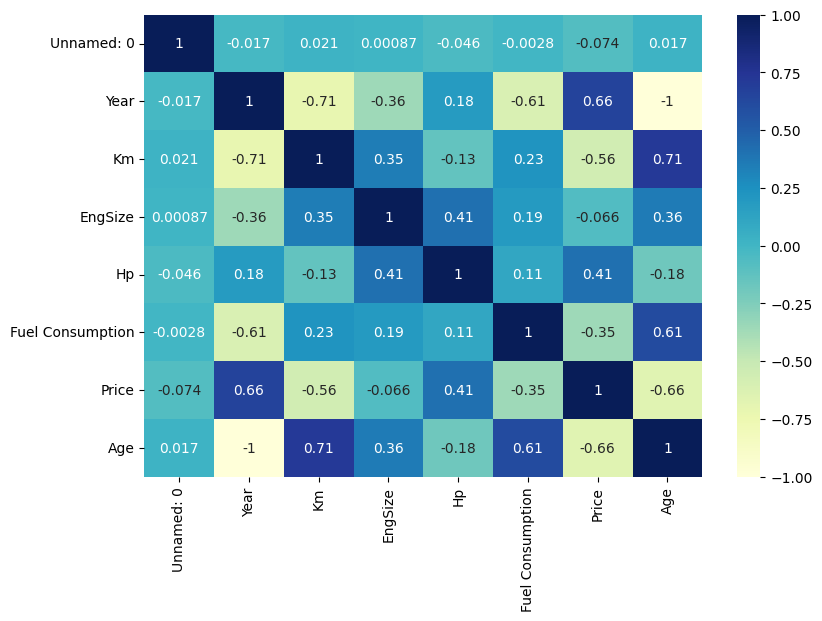

In [302]:
plt.figure(figsize=(9,6))
sns.heatmap(all_cars.corr(), cmap="YlGnBu", annot=True);
plt.show()

In [21]:
from urllib.request import urlopen
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bts
import pandas as pd
import re
import time
import sys
from datetime import datetime
from datetime import date
import json
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from patsy import dmatrices, dmatrix, demo_data
import statsmodels.api as sm
import math
import statsmodels.formula.api as smf

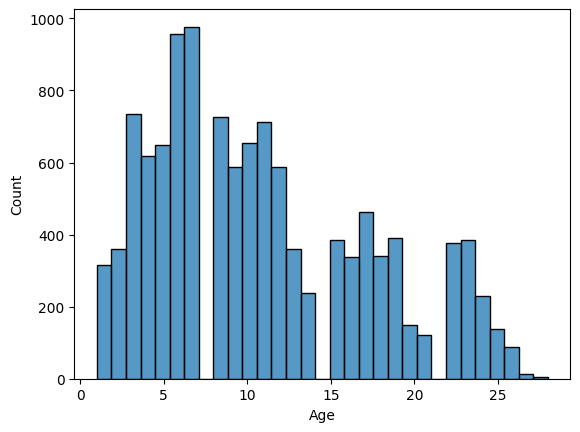

In [22]:
sns.histplot(all_cars["Age"]);

<AxesSubplot: xlabel='Year', ylabel='Count'>

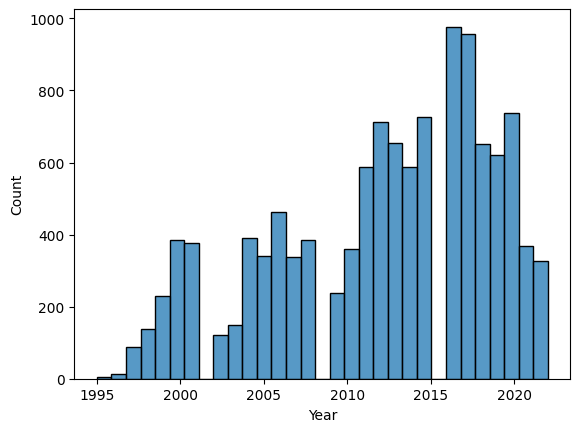

In [16]:
all_cars=all_cars.loc[all_cars["Year"]<=2022,:]
sns.histplot(all_cars["Year"])

<AxesSubplot: xlabel='Price', ylabel='Count'>

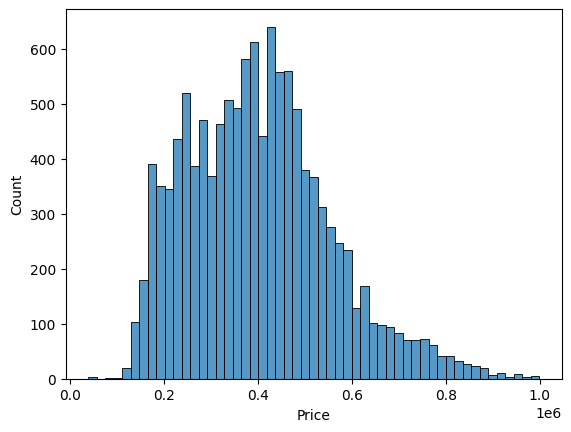

In [23]:
all_cars=all_cars.loc[all_cars["Price"]<=1000000,:]
sns.histplot(all_cars["Price"])

<AxesSubplot: xlabel='EngSize', ylabel='Count'>

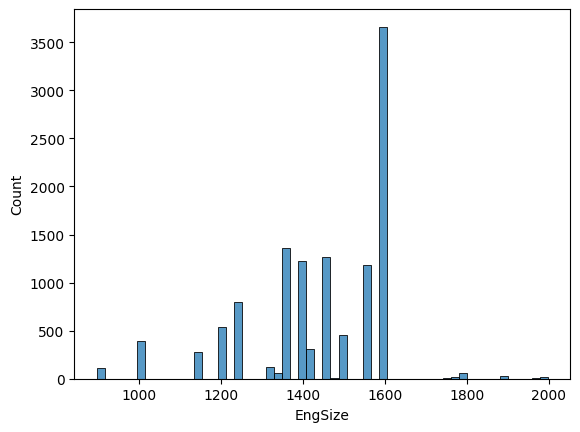

In [20]:
all_cars=all_cars.loc[all_cars["EngSize"]<=2000,:]
sns.histplot(all_cars["EngSize"])

In [19]:
all_cars["Price"].max()

999000

<AxesSubplot: xlabel='Hp', ylabel='Count'>

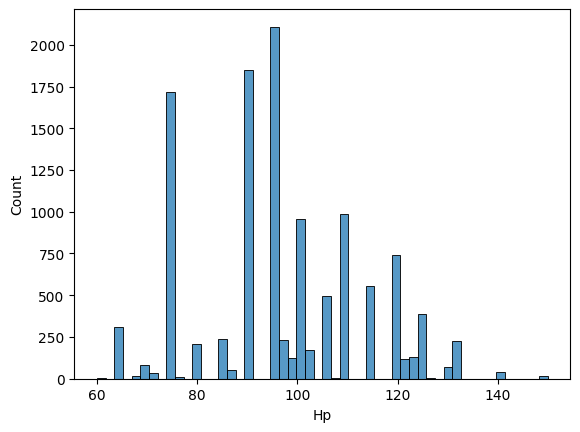

In [24]:
all_cars=all_cars.loc[all_cars["Hp"]<=150,:]
sns.histplot(all_cars["Hp"])

<AxesSubplot: xlabel='EngSize', ylabel='Count'>

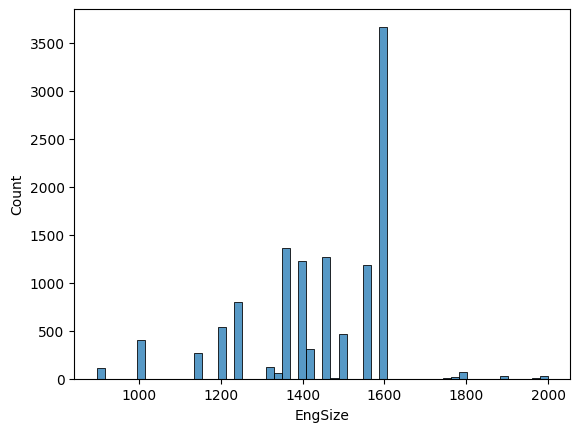

In [315]:
all_cars=all_cars.loc[all_cars["EngSize"]<=2000,:]
sns.histplot(all_cars["EngSize"])

<AxesSubplot: xlabel='Fuel Consumption', ylabel='Count'>

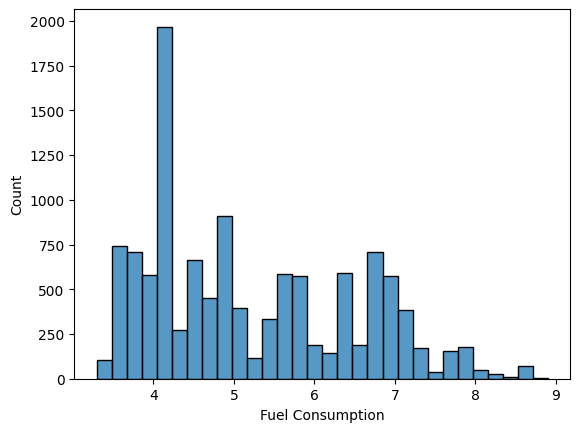

In [25]:
sns.histplot(all_cars["Fuel Consumption"])

In [24]:
all_cars.head()

,Model,Year,Km,EngSize,Hp,Fuel Consumption,Price,Age,Otomatik,Yarı Otomatik,Dizel,Hibrit,LPG & Benzin,Ford,Renault,Toyota,Volkswagen
0,1.4 Fire Urban,2022,6500,1368,95,6.4,565000,1,0,0,0,0,0,0,0,0,0
1,1.4 Fire Urban,2021,32000,1368,95,6.6,520000,2,0,0,0,0,0,0,0,0,0
2,1.4 Fire Urban,2021,52000,1368,95,6.4,483000,2,0,0,0,0,0,0,0,0,0
3,1.4 Fire Easy,2019,48000,1368,95,5.7,410000,4,0,0,0,0,0,0,0,0,0
4,1.4 Fire Urban,2022,6100,1368,95,6.4,497000,1,0,0,0,0,0,0,0,0,0


In [25]:
all_cars.columns

Index(['Model', 'Year', 'Km', 'EngSize', 'Hp', 'Fuel Consumption', 'Price',
       'Age', 'Otomatik', 'Yarı Otomatik', 'Dizel', 'Hibrit', 'LPG & Benzin',
       'Ford', 'Renault', 'Toyota', 'Volkswagen'],
      dtype='object')

In [132]:
df.head(4)

,Km,EngSize,Hp,Fuel Consumption,Price,Age,Fiat,Ford,Renault,Toyota,Volkswagen,Manuel,Automatic,Semi-Automatic,Benzin,Diesel,Hybrid,Benzin&LPG
0,6500,1368,95,6.4,565000,1,1,0,0,0,0,1,0,0,1,0,0,0
1,32000,1368,95,6.6,520000,2,1,0,0,0,0,1,0,0,1,0,0,0
2,52000,1368,95,6.4,483000,2,1,0,0,0,0,1,0,0,1,0,0,0
3,48000,1368,95,5.7,410000,4,1,0,0,0,0,1,0,0,1,0,0,0


In [156]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

X = df[['Km', 'EngSize', 'Hp', 'Fuel Consumption', 'Age', 'Fiat',
       'Ford', 'Renault', 'Toyota', 'Volkswagen', 'Manuel', 'Automatic',
       'Semi-Automatic', 'Benzin', 'Diesel', 'Hybrid', 'Benzin&LPG']]

y = np.log(df["Price"])  # Applying log transformation to the target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

X_train_scaled = std_scale.fit_transform(X_train)

X_test_scaled = std_scale.transform(X_test)

lr9 = LinearRegression()
lr9.fit(X_train_scaled, y_train)

print("Training Accuracy:", round(lr9.score(X_train_scaled, y_train),3))
print("Testing Accuracy:", round(lr9.score(X_test_scaled, y_test),3))

Training Accuracy: 0.889
Testing Accuracy: 0.913


In [157]:
import pickle

### Save the model as a pickle file###
with open('lr1_model_lastest.pkl', 'wb') as f:
    pickle.dump(lr9, f)

In [153]:
X_test

,Km,EngSize,Hp,Fuel Consumption,Age,Fiat,Ford,Renault,Toyota,Volkswagen,Manuel,Automatic,Semi-Automatic,Benzin,Diesel,Hybrid,Benzin&LPG
9098,134000,1598,115,4.2,6,0,0,0,0,1,0,0,1,0,1,0,0
8098,286000,1596,100,6.9,22,0,1,0,0,0,1,0,0,0,0,0,1
7290,228000,1596,100,6.8,19,0,1,0,0,0,1,0,0,0,0,0,1
3497,229000,1390,75,6.8,22,0,0,1,0,0,1,0,0,0,0,0,1
4243,185000,1461,75,3.6,6,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11736,178250,1598,124,7.2,14,0,0,0,1,0,1,0,0,0,0,0,1
5470,32000,1197,90,4.7,7,0,0,0,0,1,0,0,1,1,0,0,0
3002,22500,999,90,5.0,2,0,0,1,0,0,0,1,0,1,0,0,0
2614,216000,1461,65,4.7,19,0,0,1,0,0,1,0,0,0,1,0,0


In [150]:
lr8.predict([[1300,1598,125,4.7,12,0,1,0,0,0,1,0,0,1,0,0,0]])

array([-6.45898853e+11])

In [131]:
import pickle

### Save the model as a pickle file###
with open('lr_model_lastest.pkl', 'wb') as f:
    pickle.dump(lr8, f)

In [135]:
df_1=pd.read_csv("latest_version_cars.csv")

In [137]:
df_1.drop(["Unnamed: 0"],axis=1,inplace=True)

In [140]:
df_1.to_csv("app_version_cars.csv")

In [143]:
df_2=pd.read_csv("app_version_cars.csv")

In [144]:
df_2

,Unnamed: 0,Km,EngSize,Hp,Fuel Consumption,Price,Age,Fiat,Ford,Renault,Toyota,Volkswagen,Manuel,Automatic,Semi-Automatic,Benzin,Diesel,Hybrid,Benzin&LPG
0,0,6500,1368,95,6.4,565000,1,1,0,0,0,0,1,0,0,1,0,0,0
1,1,32000,1368,95,6.6,520000,2,1,0,0,0,0,1,0,0,1,0,0,0
2,2,52000,1368,95,6.4,483000,2,1,0,0,0,0,1,0,0,1,0,0,0
3,3,48000,1368,95,5.7,410000,4,1,0,0,0,0,1,0,0,1,0,0,0
4,4,6100,1368,95,6.4,497000,1,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11936,11936,24500,1598,132,5.5,742000,3,0,0,0,1,0,0,1,0,1,0,0,0
11937,11937,72000,1598,132,6.1,620000,8,0,0,0,1,0,0,1,0,1,0,0,0
11938,11938,270000,1598,110,7.2,297000,18,0,0,0,1,0,1,0,0,0,0,0,1
11939,11939,1001,1490,125,5.8,801000,1,0,0,0,1,0,0,1,0,1,0,0,0


In [142]:
df_1

,Km,EngSize,Hp,Fuel Consumption,Price,Age,Fiat,Ford,Renault,Toyota,Volkswagen,Manuel,Automatic,Semi-Automatic,Benzin,Diesel,Hybrid,Benzin&LPG
0,6500,1368,95,6.4,565000,1,1,0,0,0,0,1,0,0,1,0,0,0
1,32000,1368,95,6.6,520000,2,1,0,0,0,0,1,0,0,1,0,0,0
2,52000,1368,95,6.4,483000,2,1,0,0,0,0,1,0,0,1,0,0,0
3,48000,1368,95,5.7,410000,4,1,0,0,0,0,1,0,0,1,0,0,0
4,6100,1368,95,6.4,497000,1,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11936,24500,1598,132,5.5,742000,3,0,0,0,1,0,0,1,0,1,0,0,0
11937,72000,1598,132,6.1,620000,8,0,0,0,1,0,0,1,0,1,0,0,0
11938,270000,1598,110,7.2,297000,18,0,0,0,1,0,1,0,0,0,0,0,1
11939,1001,1490,125,5.8,801000,1,0,0,0,1,0,0,1,0,1,0,0,0


In [126]:
df.columns

Index(['Km', 'EngSize', 'Hp', 'Fuel Consumption', 'Price', 'Age', 'Fiat',
       'Ford', 'Renault', 'Toyota', 'Volkswagen', 'Manuel', 'Automatic',
       'Semi-Automatic', 'Benzin', 'Diesel', 'Hybrid', 'Benzin&LPG'],
      dtype='object')

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

std_scale = StandardScaler()

X = df[['Km', 'EngSize', 'Hp', 'Fuel Consumption', 'Age', 'Fiat',
       'Ford', 'Renault', 'Toyota', 'Volkswagen', 'Manuel', 'Automatic',
       'Semi-Automatic', 'Benzin', 'Diesel', 'Hybrid', 'Benzin&LPG']]

y = np.log(df["Price"])  # Applying log transformation to the target variable

X_scaled = std_scale.fit_transform(X)

lr = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(lr, X_scaled, y, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

lr.fit(X_scaled, y)

print("Training Accuracy:", round(lr.score(X_scaled, y), 3))


Cross-Validation Scores: [-5.76224490e+25  9.15571606e-01  8.14890989e-01  8.78733069e-01
 -6.66299650e+25]
Average Cross-Validation Score: -2.4850482794794885e+25
Training Accuracy: 0.893


In [323]:
model=sm.OLS(y,X)

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):             -206958.574
Model:                            OLS   Adj. R-squared (uncentered):        -207045.270
Method:                 Least Squares   F-statistic:                             -2387.
Date:                Fri, 03 Feb 2023   Prob (F-statistic):                        1.00
Time:                        10:03:43   Log-Likelihood:                     -1.5727e+05
No. Observations:               11941   AIC:                                  3.146e+05
Df Residuals:                   11936   BIC:                                  3.146e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Km                  -0.4208      0.020    -21.428      0.000      -0.459      -0.382
EngSize            219.1183      6.359     34.456      0.000     206.653     231.584
Hp                3168.4416     85.740     36.954      0.000    3000.377    3336.506
Fuel Consumption  -531.0886   1212.229     -0.438      0.661   -2907.254    1845.077
Age              -1.422e+04    351.171    -40.495      0.000   -1.49e+04   -1.35e+04
==============================================================================
Omnibus:                    34997.273   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4640145970.438
Skew:                          40.617   Prob(JB):                         0.00
Kurtosis:                    3055.793   Cond. No.                     1.94e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 6306013339.8725605


In [26]:
all_cars.head()

,Model,Year,Km,EngSize,Hp,Fuel Consumption,Price,Age,Otomatik,Yarı Otomatik,Dizel,Hibrit,LPG & Benzin,Ford,Renault,Toyota,Volkswagen
0,1.4 Fire Urban,2022,6500,1368,95,6.4,565000,1,0,0,0,0,0,0,0,0,0
1,1.4 Fire Urban,2021,32000,1368,95,6.6,520000,2,0,0,0,0,0,0,0,0,0
2,1.4 Fire Urban,2021,52000,1368,95,6.4,483000,2,0,0,0,0,0,0,0,0,0
3,1.4 Fire Easy,2019,48000,1368,95,5.7,410000,4,0,0,0,0,0,0,0,0,0
4,1.4 Fire Urban,2022,6100,1368,95,6.4,497000,1,0,0,0,0,0,0,0,0,0


In [269]:
all_cars.to_csv("to_project.csv")

In [27]:
all_cars.reset_index(drop=True)

,Model,Year,Km,EngSize,Hp,Fuel Consumption,Price,Age,Otomatik,Yarı Otomatik,Dizel,Hibrit,LPG & Benzin,Ford,Renault,Toyota,Volkswagen
0,1.4 Fire Urban,2022,6500,1368,95,6.4,565000,1,0,0,0,0,0,0,0,0,0
1,1.4 Fire Urban,2021,32000,1368,95,6.6,520000,2,0,0,0,0,0,0,0,0,0
2,1.4 Fire Urban,2021,52000,1368,95,6.4,483000,2,0,0,0,0,0,0,0,0,0
3,1.4 Fire Easy,2019,48000,1368,95,5.7,410000,4,0,0,0,0,0,0,0,0,0
4,1.4 Fire Urban,2022,6100,1368,95,6.4,497000,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11878,1.6 Dream,2020,24500,1598,132,5.5,742000,3,1,0,0,0,0,0,0,1,0
11879,1.6 Premium,2015,72000,1598,132,6.1,620000,8,1,0,0,0,0,0,0,1,0
11880,1.6,2005,270000,1598,110,7.2,297000,18,0,0,0,0,1,0,0,1,0
11881,1.5 Dream,2022,1001,1490,125,5.8,801000,1,1,0,0,0,0,0,0,1,0


In [28]:
all_cars=all_cars.drop(columns=["Unnamed: 0","Model"])

KeyError: "['Unnamed: 0'] not found in axis"

In [312]:
all_cars.head()

,Brand,Year,Km,EngSize,Hp,Fuel,Gear Type,Fuel Consumption,Price,Age
0,Fiat,2022,6500,1368,95,Benzin,Düz,6.4,565000,1
1,Fiat,2021,32000,1368,95,Benzin,Düz,6.6,520000,2
2,Fiat,2021,52000,1368,95,Benzin,Düz,6.4,483000,2
3,Fiat,2019,48000,1368,95,Benzin,Düz,5.7,410000,4
4,Fiat,2022,6100,1368,95,Benzin,Düz,6.4,497000,1


In [305]:
all_cars.shape

(11941, 12)

In [29]:
all_cars.drop_duplicates(inplace=True)

In [30]:
all_cars.shape

(11840, 17)

In [329]:
all_cars.tail()

,Brand,Year,Km,EngSize,Hp,Fuel,Gear Type,Fuel Consumption,Price,Age
1795,Toyota,2020,24500,1598,132,Benzin,Otomatik,5.5,742000,3
1796,Toyota,2015,72000,1598,132,Benzin,Otomatik,6.1,620000,8
1797,Toyota,2005,270000,1598,110,LPG & Benzin,Düz,7.2,297000,18
1798,Toyota,2022,1001,1490,125,Benzin,Otomatik,5.8,801000,1
1799,Toyota,2020,86,1598,132,Benzin,Otomatik,5.5,759000,3


In [328]:
X = all_cars["Km","Hp","EngSize","FuelConsumption"]
y = all_cars["Price"]

KeyError: ('Km', 'Hp', 'EngSize', 'FuelConsumption')

In [325]:
model=sm.OLS(y,X)

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):             -206958.574
Model:                            OLS   Adj. R-squared (uncentered):        -207045.270
Method:                 Least Squares   F-statistic:                             -2387.
Date:                Fri, 03 Feb 2023   Prob (F-statistic):                        1.00
Time:                        10:24:04   Log-Likelihood:                     -1.5727e+05
No. Observations:               11941   AIC:                                  3.146e+05
Df Residuals:                   11936   BIC:                                  3.146e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Km                  -0.4208      0.020    -21.428      0.000      -0.459      -0.382
EngSize            219.1183      6.359     34.456      0.000     206.653     231.584
Hp                3168.4416     85.740     36.954      0.000    3000.377    3336.506
Fuel Consumption  -531.0886   1212.229     -0.438      0.661   -2907.254    1845.077
Age              -1.422e+04    351.171    -40.495      0.000   -1.49e+04   -1.35e+04
==============================================================================
Omnibus:                    34997.273   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4640145970.438
Skew:                          40.617   Prob(JB):                         0.00
Kurtosis:                    3055.793   Cond. No.                     1.94e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [283]:
GearD =pd.get_dummies(all_cars["Gear Type"],drop_first=True)
FuelD =pd.get_dummies(all_cars["Fuel"],drop_first=True)
BranT =pd.get_dummies(all_cars["Brand"],drop_first=True)


all_cars.drop(["Gear Type","Fuel","Brand"],axis=1,inplace=True)

all_cars=pd.concat([all_cars,GearD,FuelD,BranT],axis=1)

In [287]:
all_cars.head()

,Year,Km,EngSize,Hp,Fuel Consumption,Price,Age,Otomatik,Yarı Otomatik,Dizel,Hibrit,LPG & Benzin,Ford,Renault,Toyota,Volkswagen
0,2022,6500,1368,95,6.4,565000,1,0,0,0,0,0,0,0,0,0
1,2021,32000,1368,95,6.6,520000,2,0,0,0,0,0,0,0,0,0
2,2021,52000,1368,95,6.4,483000,2,0,0,0,0,0,0,0,0,0
3,2019,48000,1368,95,5.7,410000,4,0,0,0,0,0,0,0,0,0
4,2022,6100,1368,95,6.4,497000,1,0,0,0,0,0,0,0,0,0


In [288]:
all_cars.tail()

,Year,Km,EngSize,Hp,Fuel Consumption,Price,Age,Otomatik,Yarı Otomatik,Dizel,Hibrit,LPG & Benzin,Ford,Renault,Toyota,Volkswagen
1795,2020,24500,1598,132,5.5,742000,3,1,0,0,0,0,0,0,1,0
1796,2015,72000,1598,132,6.1,620000,8,1,0,0,0,0,0,0,1,0
1797,2005,270000,1598,110,7.2,297000,18,0,0,0,0,1,0,0,1,0
1798,2022,1001,1490,125,5.8,801000,1,1,0,0,0,0,0,0,1,0
1799,2020,86,1598,132,5.5,759000,3,1,0,0,0,0,0,0,1,0
